In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from tqdm import tqdm

In [8]:
!ls

agg-0  agg-2  CSLU_splits.ipynb  mod-agg-1  mod-agg-3
agg-1  agg-3  mod-agg-0		 mod-agg-2


In [9]:
!ls agg-0/IN/

FIN00004-chunk-00.wav  FIN00127-chunk-01.wav  FIN00239-chunk-00.wav
FIN00004-chunk-01.wav  FIN00127-chunk-02.wav  FIN00239-chunk-01.wav
FIN00004-chunk-02.wav  FIN00127-chunk-03.wav  FIN00239-chunk-02.wav
FIN00004-chunk-03.wav  FIN00127-chunk-04.wav  FIN00244-chunk-00.wav
FIN00004-chunk-04.wav  FIN00127-chunk-05.wav  FIN00244-chunk-01.wav
FIN00004-chunk-05.wav  FIN00139-chunk-00.wav  FIN00244-chunk-02.wav
FIN00006-chunk-00.wav  FIN00141-chunk-00.wav  FIN00244-chunk-03.wav
FIN00006-chunk-01.wav  FIN00141-chunk-01.wav  FIN00244-chunk-04.wav
FIN00006-chunk-02.wav  FIN00141-chunk-02.wav  FIN00244-chunk-05.wav
FIN00006-chunk-03.wav  FIN00143-chunk-00.wav  FIN00244-chunk-06.wav
FIN00008-chunk-00.wav  FIN00143-chunk-01.wav  FIN00244-chunk-07.wav
FIN00008-chunk-01.wav  FIN00145-chunk-00.wav  FIN00244-chunk-08.wav
FIN00008-chunk-02.wav  FIN00145-chunk-01.wav  FIN00244-chunk-09.wav
FIN00008-chunk-03.wav  FIN00145-chunk-02.wav  FIN00249-chunk-00.wav
FIN00008-chunk-04.wav  FIN00147-chunk-00.wav  FI

In [10]:
import IPython
IPython.display.Audio("agg-0/IN/FIN00252-chunk-01.wav")

In [11]:
IPython.display.display(IPython.display.Audio("agg-0/IN/FIN00123-chunk-00.wav"))
IPython.display.display(IPython.display.Audio("agg-0/IN/FIN00123-chunk-01.wav"))
IPython.display.display(IPython.display.Audio("agg-0/IN/FIN00123-chunk-02.wav"))
IPython.display.display(IPython.display.Audio("agg-0/IN/FIN00123-chunk-03.wav"))
IPython.display.display(IPython.display.Audio("agg-0/IN/FIN00123-chunk-04.wav"))

In [12]:
IPython.display.display(IPython.display.Audio("/exp/data/CSLU-AccentedEnglish/cslu_fae/speech/IN/FIN00123.wav"))

In [13]:
IPython.display.display(IPython.display.Audio("agg-0/IN/FIN00388-chunk-00.wav"))
IPython.display.display(IPython.display.Audio("agg-0/IN/FIN00388-chunk-01.wav"))
IPython.display.display(IPython.display.Audio("agg-0/IN/FIN00388-chunk-02.wav"))
IPython.display.display(IPython.display.Audio("agg-0/IN/FIN00388-chunk-03.wav"))
IPython.display.display(IPython.display.Audio("agg-0/IN/FIN00388-chunk-04.wav"))


In [14]:
agg = 'agg-0'
_id = '388'

IPython.display.display(IPython.display.Audio(f"{agg}/IN/FIN00{_id}-chunk-00.wav"))
IPython.display.display(IPython.display.Audio(f"{agg}/IN/FIN00{_id}-chunk-01.wav"))
IPython.display.display(IPython.display.Audio(f"{agg}/IN/FIN00{_id}-chunk-02.wav"))
IPython.display.display(IPython.display.Audio(f"{agg}/IN/FIN00{_id}-chunk-03.wav"))
IPython.display.display(IPython.display.Audio(f"{agg}/IN/FIN00{_id}-chunk-04.wav"))

print("original: ", end="")
IPython.display.display(IPython.display.Audio(f"/exp/data/CSLU-AccentedEnglish/cslu_fae/speech/IN/FIN00{_id}.wav"))

original: 

In [15]:
IPython.display.display(IPython.display.Audio("/exp/data/CSLU-AccentedEnglish/cslu_fae/speech/IN/FIN00123.wav"))

In [16]:
from pathlib import Path

In [17]:
base_dir = f"/exp/data/CSLU-AccentedEnglish/cslu_fae/speech/"
# original_audios = list(Path(base_dir).glob("*/*.wav"))
original_audios = list(Path(base_dir).glob("IN/*.wav"))

In [18]:
import os
import numpy as np
sampled_audio = original_audios[np.random.choice(len(original_audios))]
accent, filename = str(sampled_audio).split(os.path.sep)[-2:]
print(accent, filename)
print("---original---")
IPython.display.display(IPython.display.Audio(sampled_audio))

print("---chunks----")
aggressiveness = 0
chunk_index = 0
while(True):
    chunk_path = f'agg-{aggressiveness}/{accent}/{filename.replace(".wav", "")}-chunk-{chunk_index:02d}.wav'
    if os.path.isfile(chunk_path):
        
        chunk_index+=1
        print(chunk_path)
    
        IPython.display.display(IPython.display.Audio(chunk_path))
    else:
        break
    

IN FIN00011.wav
---original---


---chunks----
agg-0/IN/FIN00011-chunk-00.wav


### Analysing the audio stats

In [19]:
base_dir = f"/exp/data/CSLU-AccentedEnglish/cslu_fae/speech/"
# original_audios = list(Path(base_dir).glob("*/*.wav"))
original_audios = list(Path(base_dir).glob("*/*.wav"))
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-yl9mn59r because the default path (/home/mayur/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [20]:
import wave
import contextlib
def get_duration(fname):
    with contextlib.closing(wave.open(fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
    return duration

In [31]:
def get_stats(aggressiveness):
    dct_list = []
    for orig_audio in tqdm(original_audios):
        accent, filename = str(orig_audio).split(os.path.sep)[-2:]
#         print(accent, filename)
        actual_duration = get_duration(str(orig_audio))
        chunk_index = 0
        while(True):
            chunk_path = f'agg-{aggressiveness}/{accent}/{filename.replace(".wav", "")}-chunk-{chunk_index:02d}.wav'
            if os.path.isfile(chunk_path):
                chunk_duration = get_duration(chunk_path)
                dct_list.append({
                    "accent": accent,
                    "filename": filename, 
                    "actual_duration": actual_duration,
                    "chunk_duration": chunk_duration,
                    "chunk_index": chunk_index,
                })
                chunk_index+=1
            else:
                break
        
        
    print(f"aggressiveness: {aggressiveness}")
    df = pd.DataFrame(dct_list)
    plt.hist(df["chunk_duration"])
    plt.show()
    IPython.display.display(df.groupby(by=["accent"])["chunk_duration"].aggregate(["mean", "std", "median", "min", "max"]))
    
    
    


In [32]:
# get_stats(0)
# get_stats(1)
# get_stats(2)
# get_stats(3)

In [33]:
# mask = (df["accent"] == "AR") & (df["chunk_duration"] < 7)
# df.loc[mask, ["chunk_duration", "filename"]]


# plt.hist(df.loc[mask, ["chunk_duration"]])
# df.loc[mask, ["chunk_duration"]].describe()
# df

In [34]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(100, 100))
# df['chunk_duration'].hist(by=df['accent'], )
# plt.show()

In [35]:
# agg = 'agg-0'
# _id = '086'

# IPython.display.display(IPython.display.Audio(f"{agg}/IN/FIN00{_id}-chunk-00.wav"))
# IPython.display.display(IPython.display.Audio(f"{agg}/IN/FIN00{_id}-chunk-01.wav"))
# IPython.display.display(IPython.display.Audio(f"{agg}/IN/FIN00{_id}-chunk-02.wav"))
# IPython.display.display(IPython.display.Audio(f"{agg}/IN/FIN00{_id}-chunk-03.wav"))
# IPython.display.display(IPython.display.Audio(f"{agg}/IN/FIN00{_id}-chunk-04.wav"))

# print("original: ", end="")
# IPython.display.display(IPython.display.Audio(f"/exp/data/CSLU-AccentedEnglish/cslu_fae/speech/MY/FMY00472.wav"))

In [36]:
def get_mod_stats(aggressiveness):
    dct_list = []
    for orig_audio in tqdm(original_audios):
        accent, filename = str(orig_audio).split(os.path.sep)[-2:]
#         print(accent, filename)
        actual_duration = get_duration(str(orig_audio))
        chunk_index = 0
        while(True):
            chunk_path = f'mod-agg-{aggressiveness}/{accent}/{filename.replace(".wav", "")}-chunk-{chunk_index:02d}.wav'
            if os.path.isfile(chunk_path):
                chunk_duration = get_duration(chunk_path)
                dct_list.append({
                    "accent": accent,
                    "filename": filename, 
                    "actual_duration": actual_duration,
                    "chunk_duration": chunk_duration,
                    "chunk_index": chunk_index,
                })
                chunk_index+=1
            else:
                break
        
        
    print(f"aggressiveness: {aggressiveness}")
    df = pd.DataFrame(dct_list)
    plt.hist(df["chunk_duration"])
    plt.show()
    IPython.display.display(df.groupby(by=["accent"])["chunk_duration"].aggregate(["mean", "std", "median", "min", "max"]))
    return df


100%|██████████████████████████████████| 4925/4925 [00:19<00:00, 251.54it/s]


aggressiveness: 3


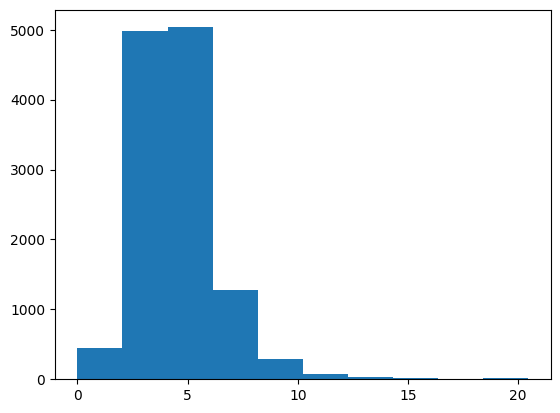

,mean,std,median,min,max
accent,,,,,
AR,4.542054,1.654381,4.230,0.00,12.18
BP,4.715743,1.667718,4.350,0.51,19.86
CA,4.403974,1.580267,4.110,0.33,14.79
FA,4.597680,1.574379,4.260,0.72,13.89
FR,4.877304,1.920518,4.410,0.39,19.59
GE,4.754651,2.088368,4.290,0.36,20.46
HI,4.693595,1.725900,4.320,0.30,19.62
HU,4.828409,1.939299,4.440,0.45,20.10
IN,4.417286,1.483200,4.080,0.75,10.77


In [37]:
# stats_0_data = get_mod_stats(0)
# stats_1_data = get_mod_stats(1)
# stats_2_data = get_mod_stats(2)
stats_3_data = get_mod_stats(3)

In [38]:
stats_3_data

,accent,filename,actual_duration,chunk_duration,chunk_index
0,MY,FMY00472.wav,20.48,6.36,0
1,MY,FMY00472.wav,20.48,3.63,1
2,MY,FMY00472.wav,20.48,4.92,2
3,MY,FMY00342.wav,20.48,3.90,0
4,MY,FMY00342.wav,20.48,4.38,1
...,...,...,...,...,...
12166,AR,FAR00663.wav,20.48,2.91,3
12167,AR,FAR00594.wav,20.48,4.08,0
12168,AR,FAR00594.wav,20.48,4.83,1
12169,AR,FAR00594.wav,20.48,9.18,2


In [41]:
# print(len(stats_3_data), len(stats_3_data[(stats_3_data["chunk_duration"] > 14) | (stats_3_data["chunk_duration"] < 1)]))


def to_delete_list(df):
    # assert(false)
    filtered_audio = df[(df["chunk_duration"] > 14) | (df["chunk_duration"] < 1)]
    
    
    ls = []
    
    for row in filtered_audio.iterrows():
#         print(row, type(row))
        row = row[1]
        remove_path = f"{row['accent']}/{row['filename'].replace('.wav', '')}-chunk-{row['chunk_index']:02d}.wav"
        ls.append(remove_path)
    
    
#     print(filtered_audio)
    return ls

def delete_from_list(ls, pref = f"mod-agg-3", ):
    for path in ls:
        full_path = os.path.join(pref, path)
        os.remove(full_path)



In [43]:
# delete_from_list(to_delete_list(stats_3_data))

100%|██████████████████████████████████| 4925/4925 [00:19<00:00, 249.17it/s]


aggressiveness: 3


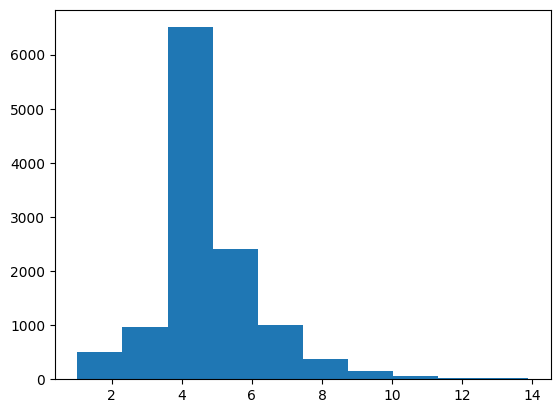

,mean,std,median,min,max
accent,,,,,
AR,4.593028,1.598195,4.260,1.23,12.18
BP,4.687958,1.503297,4.350,1.02,11.94
CA,4.419630,1.431466,4.140,1.05,11.91
FA,4.612691,1.559545,4.260,1.23,13.89
FR,4.849809,1.700412,4.410,1.11,13.86
GE,4.695236,1.747292,4.290,1.02,13.53
HI,4.679813,1.550478,4.335,1.05,12.30
HU,4.791128,1.689847,4.440,1.02,13.50
IN,4.455704,1.444110,4.080,1.02,10.77


In [46]:
new_stats_3_data = get_mod_stats(3)
ls = to_delete_list(new_stats_3_data)
assert(len(ls) == 0)

In [120]:
def play_orig(accent, filename):
    path = f"/exp/data/CSLU-AccentedEnglish/cslu_fae/speech/{accent}/{filename}"
    IPython.display.display(IPython.display.Audio(path))
    
def play_chunks(accent, filename, directory):
    for chunk_index in range(0, 10):
        path = f'{directory}/{accent}/{filename.replace(".wav", "")}-chunk-{chunk_index:02d}.wav'
        if(os.path.isfile(path)):
            IPython.display.display(IPython.display.Audio(path))
        else: break

In [121]:
play_orig("MY", "FMY00472.wav")
play_chunks("MY", "FMY00472.wav", "mod-agg-3")

In [ ]:
/exp/data/CSLU-AccentedEnglish/cslu_fae/speech/IN/FIN00{_id}.wav